> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> ### In the TMDb movie data, we have many columns to analyze, such as popularity, revenue, genres , voting, release year, runtime and others.


### Question(s) for Analysis

#### Question 1 : Which genres have most popularity for the past years ?
#### Question 2 : Does the movie with long runtime receive a better vote?
#### Question 3 : How many movies are released each year?
#### Question 4 : Does the revenue changed or still the same over the years?

## import packages


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:

data_1= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
data_1.head()
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
data_1.shape

(10866, 21)

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
data_1.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [31]:
data_1.describe(exclude="number")

imdb_id original_title  \
count        1992           1992   
unique       1992           1980   
top     tt1134674      Halloween   
freq            1              2   

                                                     cast  \
count                                                1992   
unique                                               1980   
top     Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
freq                                                    3   

                                homepage        director  \
count                               1992            1992   
unique                              1961            1340   
top     http://www.thehungergames.movie/  John Carpenter   
freq                                   4              17   

                     tagline        keywords  \
count                   1992            1992   
unique                  1983            1947   
top     Two Films. One Love.  woman director   
freq                       3              12   

                                                 overview genres  \
count                                                1992   1992   
unique                                               1992     19   
top     The story follows a young lawyer, Arthur Kipps...  Drama   
freq                                                    1    435   

                                production_companies release_date  
count                                           1992         1992  
unique                                          1768         1531  
top     Walt Disney Pictures|Pixar Animation Studios       9/9/11  
freq                                              13            8

In [32]:
data_1.duplicated().sum()


0

In [33]:
data_1.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [7]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.3MB/s eta 0:00:01   63% |████████████████████▎           | 6.6MB 29.1MB/s eta 0:00:01    93% |█████████████████████████████▉  | 9.7MB 29.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.4MB/s eta 0:00:01   31% |██████████▏                     | 4.2MB 29.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
#Remove duplicate rows.

data_1.drop_duplicates(inplace=True)

In [10]:
data_1.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#Drop missing values.

data_1.dropna(inplace=True)
data_1.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


###  Which genres have most popularity for the past years ? 

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data_1['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', 'Action|Crime|Thriller',
       'Western|Drama|Adventure|Thriller',
       'Science Fiction|Action|Thriller|Adventure',
       'Drama|Adventure|Science Fiction',
       'Family|Animation|Adventure|Comedy', 'Comedy|Animation|Family',
       'Action|Adventure|Crime',
       'Science Fiction|Fantasy|Action|Adventure', 'Drama|Science Fiction',
       'Action|Comedy|Science Fiction', 'Action|Adventure|Science Fiction',
       'Crime|Drama|Mystery|Western', 'Crime|Action|Thriller',
       'Science Fiction|Action|Adventure', 'War|Adventure|Science Fiction',
       'Action|Family|Science Fiction|Adventure|Mystery',
       'Action|Drama|Thriller', 'Drama|Romance', 'Comedy|Drama', 'Action',
       'Crime|Comedy|Action|Adventure', 'Drama|Thriller|History',
       'Action|Science Fiction|Thriller', 'Mystery|Drama',
       'Crime|Action|Science Fiction'

In [6]:
# as you all see the uniques are alot so I'm going to take only the first valiue 
data_1['genres'] = data_1['genres'].str.split('|',1,expand = True)[0]
data_1.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime     genres  \
0  Twenty-two years after the events of Jurassic ...     124     Action   
1  An apocalyptic story set in the furthest reach...     120     Action   
2  Beatrice Prior must confront her inner demons ...     119  Adventure   
3  Thirty years after defeating the Galactic Empi...     136     Action   
4  Deckard Shaw seeks revenge against Dominic Tor...     137     Action   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

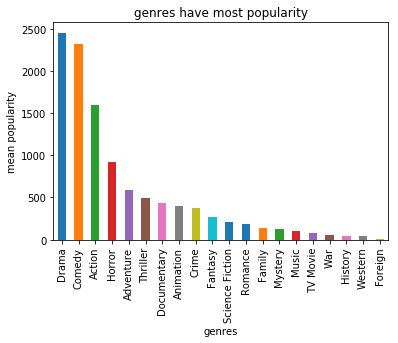

In [7]:
data_1.groupby('genres')['popularity'].mean().sort_values(ascending = False)
data_1['genres'].value_counts().plot( x='popularity', y='genres',kind='bar');
plt.title('genres have most popularity');
plt.xlabel('genres');
plt.ylabel('mean popularity');

It appears that drama and then comedy are the most popular, then action follows them with a large difference from the rest, then adventure and then horror follow with a small difference between them.

### Does the movie  with long runtime receive a better vote?

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
median = data_1['runtime'].median()
short = data_1.query('runtime < {}'.format(median))
long = data_1.query('runtime >= {}'.format(median))

mean_runtime_short = short['runtime'].mean()
mean_runtime_long = long['runtime'].mean()




In [28]:
def short_and_long(df):
    
    median = df['runtime'].median()
    short = df.query('runtime < {}'.format(median))
    long = df.query('runtime >= {}'.format(median))
    
    mean_runtime_short = short['runtime'].mean()
    mean_runtime_long = long['runtime'].mean()
    print(f"mean_runtime_short= {mean_runtime_short} , mean_runtime_long= {mean_runtime_long}")
    
    return mean_runtime_short,mean_runtime_long

In [29]:
mean_runtime_short,mean_runtime_long=short_and_long(data_1)

mean_runtime_short= 89.97233606557377 , mean_runtime_long= 121.47539370078741


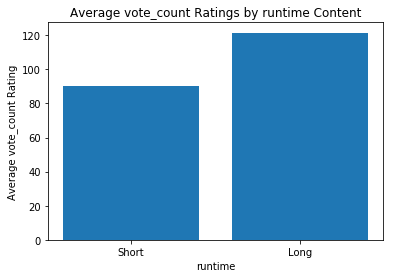

In [30]:
locations = [1, 2]
heights = [mean_runtime_short , mean_runtime_long]
labels = ['Short', 'Long']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average vote_count Ratings by runtime Content')
plt.xlabel('runtime')
plt.ylabel('Average vote_count Rating');

It appears to us that the longer runtime got a higher vote than the shorter runtime by not a little difference

### How many movies are released each year?

Text(0,0.5,'Number of movies released')

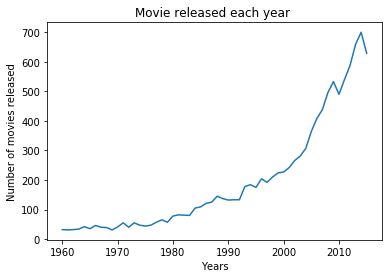

In [4]:
movies_per_year= data_1['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie released each year ');
plt.xlabel('Years');
plt.ylabel('Number of movies released')

It appears to us out here that the movies are released from the beginning of the sixties to the end of the nineties increased slightly, and then from the beginning of the 2000s we are witnessing a significant increase in the movies are released

### Does the revenue changed or still the same over the years?


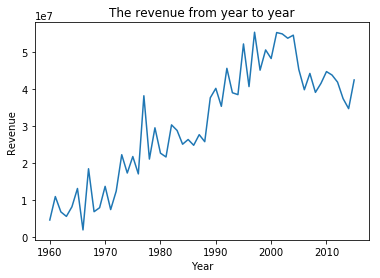

In [3]:
revenues_by_years = data_1.groupby('release_year')['revenue'].mean()

plt.plot(revenues_by_years)
plt.title('The revenue from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()  

It appears to us here that the revenue from the beginning of the sixties has increased with a slight fluctuation in the beginning of 2000, then we notice a sharp decline, and then at the beginning of 2010 we witness a return to the increase again

<a id='conclusions'></a>
## Conclusions

### Q1 :It seems the most popular kind of movie through the years is the drama and then the comedy and come after them the action movie with big gap between them, on the less side is foreign and then westem

### Q2 :It seems that movies with more runtime get more votes than least by not a little

### Q3 :The process of making films over the years has been increasing , as in the beginning of the sixties to the seventies it was a small increase, and then the eighties began to increase more until we reached the two-thousandth decade and increased productions greater than before

### Q4 : At the beginning of the sixties , the revenue fluctuated between the rise and fall until we reached the seventies, and the revenue was in the rise until we reached almost the end of the seventies, it began to decline sharply, and then in the nineties it began to rise incrementally until it reached in the mid-2000s, and then it began to decline sharply and in  mid 2010 seemed to be increasing

### limitation section : In the genres there are too many uniques and this is what forced me to separate them and take only the first value in them and therefore it is possible that the exact answer I am looking for may not appear.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0